In [1]:
from keras.datasets import mnist

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 16s 1us/step


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

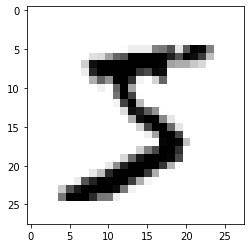

In [6]:
single_image = x_train[0]
plt.imshow(single_image,cmap='gray_r')

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_train.shape

(60000,)

In [9]:
from keras.utils.np_utils import to_categorical

In [10]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [11]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_cat_train[0] # 5 in y_train.shape index 0 -> 5 index in y_cat_train is 1

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
single_image.max()

255

In [17]:
x_train = x_train / x_train.max()

In [18]:
x_test = x_test / x_test.max()

In [19]:
scaled_image = x_train[0]

In [21]:
scaled_image.max()

1.0

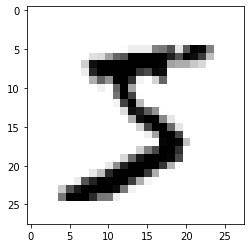

In [22]:
plt.imshow(scaled_image, cmap='gray_r')

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
x_train = x_train.reshape(60000,28,28,1)

In [25]:
x_train.shape

(60000, 28, 28, 1)

In [26]:
x_test = x_test.reshape(10000,28,28,1)

In [27]:
x_test.shape

(10000, 28, 28, 1)

In [28]:
from keras.models import Sequential

In [29]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [34]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# 2D -> 1D
model.add(Flatten())

# DENSE LAYER
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 57s 19ms/step - loss: 0.2870 - accuracy: 0.9095
Epoch 2/2
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0530 - accuracy: 0.9842


In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.0440 - accuracy: 0.9860


[0.043956365436315536, 0.9860000014305115]

In [39]:
from sklearn.metrics import classification_report

In [45]:
predictions = model.predict_classes(x_test)

d:\python\python-opencv-and-deep-learning\env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [48]:
print(classification_report(y_test, predicitons))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

